 # Wpływ pandemi COVID-19 na zmianę jakości powietrza w UK #

* * * 

## 1. Wstęp
Celem niniejszego badania jest ocena wpływu pandemii COVID-19 na zmiany jakości powietrza na obszarze Wielkiej Brytanii. Punktem wyjścia dla analizy była wspólna hipoteza badawcza członków zespołu, zgodnie z którą ograniczenia mobilności społecznej, wymuszone przez wprowadzone lockdowny oraz restrykcje sanitarne, mogły znacząco wpłynąć na poziom zanieczyszczeń powietrza w analizowanym okresie.

Podstawowym źródłem danych wykorzystanym w badaniu był zbiór [Hourly Air Quality Data from the UK DEFRA AURN network for the years 2015–2023](https://www.kaggle.com/datasets/airqualityanthony/uk-defra-aurn-air-quality-data-2015-2023), zawierający szczegółowe, godzinowe dane<br /> 
o jakości powietrza pozyskane z Automatycznej Sieci Monitorującej (Automatic Urban and Rural Network – AURN). Dane obejmują pomiary dla kluczowych zanieczyszczeń atmosferycznych, takich jak: tlenek węgla (CO), tlenki azotu (NOₓ), dwutlenek azotu (NO₂), tlenek azotu (NO), ozon (O₃) oraz dwutlenek siarki (SO₂). Każdy pomiar został dodatkowo wzbogacony o dane meteorologiczne oraz współrzędne geoprzestrzenne punktów pomiarowych, co umożliwia precyzyjne przypisanie wyników do konkretnych lokalizacji i warunków atmosferycznych.

Na potrzeby badania ocena jakość powietrza określana na podstawie stężeń CO, NOₓ, NO₂, NO, O₃ i SO₂ została określona za pomocą indeksu jakości powietrza (AQI – Air Quality Index).<br />
W zależności od wartości AQI przypisuje się jedną z kategorii, np.:

| AQI      | Kategoria (PL)                              | Odpowiednik US-EPA / WHO       |
| -------- | ------------------------------------------- | ------------------------------ |
| <span style="color: black; background-color: green;"> 0–50     | Bardzo dobra (zielony)                      | Good                           |
| <span style="color: black; background-color: yellow;"> 51–100   | Dobra / Umiarkowana                         | Moderate                       |
| <span style="color: black; background-color: orange;"> 101–150  | Umiarkowana / Uciążliwa dla wrażliwych grup | Unhealthy for Sensitive Groups |
| <span style="color: black; background-color: red;"> 151–200+ | Zła, bardzo zła, ekstremalna                | Unhealthy–Hazardous            |


Aby zbadać potencjalny związek pomiędzy skalą rozprzestrzeniania się wirusa SARS-CoV-2 a jakością powietrza – pośrednio, poprzez wpływ lockdownów na aktywność społeczną i przemysłową 
<br /> – w analizie uwzględniono również dane ze strony [UKHSA data dashboard](hhttps://ukhsa-dashboard.data.gov.uk/). Wykorzystano plik ltla_newCasesBySpecimenDate. Zawiera on informacje o liczbie zakażeń w poszczególnych miastach Wielkiej Brytanii w okresie od marca 2020 do stycznia 2022 roku.

Dwa zestawy danych zostały zintegrowane na podstawie daty oraz lokalizacji (region geograficzny), przy czym dane o jakości powietrza zostały agregowane do poziomu dziennego w celu umożliwienia spójnego połączenia z dobowymi danymi dotyczącymi liczby zakażeń. Lokalizacje punktów pomiarowych zostały przypisane do odpowiadających im miast, zgodnie z systemem klasyfikacji przestrzennej stosowanym w pliku  ltla_newCasesBySpecimenDate. Tak przygotowany zbiór umożliwia równoległą analizę zmienności poziomu zanieczyszczeń oraz przebiegu fal pandemicznych w ujęciu regionalnym i czasowym.

Zintegrowany zbiór danych pozwala na weryfikację następujących pytań badawczych:

* Czy pandemia COVID-19 miała istotny wpływ na jakość powietrza w Wielkiej Brytanii?

* Jakie zmiany w poziomach poszczególnych zanieczyszczeń atmosferycznych można zaobserwować w okresie przed i w trakcie pandemii?

* Czy różnice te są skorelowane z intensywnością poszczególnych fal zakażeń oraz wprowadzanymi ograniczeniami społecznymi?

* W jakim stopniu efekty pandemii były trwałe lub przejściowe?

Dla celów porównawczych okres pandemii został podzielony na sześć głównych faz, zgodnych z kalendarzem epidemiologicznym:
1. Początek epidemii i globalna eskalacja (grudzień 2019 – marzec 2020)

1. Pierwsza fala i lockdowny (marzec – czerwiec 2020)

1. Okres letni – częściowe poluzowania (lipiec – wrzesień 2020)

1. Druga fala pandemii (październik 2020 – styczeń 2021)

1. Początek kampanii szczepień (grudzień 2020 – marzec 2021)

1. Dominacja wariantu Delta i kolejne fale (kwiecień – grudzień 2021)



## 2. Czyszczenie i porządkowanie danych



In [1]:
#import bibliotek

import kagglehub as kg
import pandas as pd

In [2]:
# import danych o jakości powietrza

path = kg.dataset_download("airqualityanthony/uk-defra-aurn-air-quality-data-2015-2023")

In [3]:
# wczytanie danych do ramki danych pandas i obróbka danych

df_air = pd.read_csv(path + "/AURN_2015_2023.csv")

In [4]:
#pokaz wszystkie kolumny
pd.set_option('display.max_columns', None)
#jakie są site_types
#print(df_air['site_type'].unique())
df_air

,Unnamed: 0,site,code,date,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type
0,1,Aberdeen Erroll Park,ABD9,2021-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
1,2,Aberdeen Erroll Park,ABD9,2021-10-01 01:00:00,NaN,18.54277,14.25911,2.79374,35.32389,NaN,4.850,2.830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
2,3,Aberdeen Erroll Park,ABD9,2021-10-01 02:00:00,NaN,13.90708,12.77317,0.73952,30.23486,NaN,4.325,2.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
3,4,Aberdeen Erroll Park,ABD9,2021-10-01 03:00:00,NaN,15.88038,13.32908,1.66392,21.10453,NaN,5.375,3.561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
4,5,Aberdeen Erroll Park,ABD9,2021-10-01 04:00:00,NaN,20.20285,18.26575,1.26334,16.41463,NaN,5.450,3.679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,57.157400,-2.094770,Urban Background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252609,11252610,York Fishergate,YK11,2023-11-05 19:00:00,NaN,24.86250,17.02125,5.11393,NaN,NaN,30.918,27.000,NaN,NaN,NaN,NaN,2.5,245.2,6.6,53.951889,-1.075861,Urban Traffic
11252610,11252611,York Fishergate,YK11,2023-11-05 20:00:00,NaN,38.44125,29.64375,5.73758,NaN,NaN,79.228,73.000,NaN,NaN,NaN,NaN,2.6,248.0,6.7,53.951889,-1.075861,Urban Traffic
11252611,11252612,York Fishergate,YK11,2023-11-05 21:00:00,NaN,35.38125,28.87875,4.24082,NaN,NaN,85.992,85.000,NaN,NaN,NaN,NaN,2.5,239.1,6.8,53.951889,-1.075861,Urban Traffic
11252612,11252613,York Fishergate,YK11,2023-11-05 22:00:00,NaN,35.76375,26.01000,6.36123,NaN,NaN,98.552,99.000,NaN,NaN,NaN,NaN,3.1,224.2,7.0,53.951889,-1.075861,Urban Traffic


Podczas weryfikacji danych stwierdzono obecność znacznej liczby braków (wartości typu NaN) w rejestrach pochodzących z wielu lokalizacji. Skala brakujących danych w niektórych przypadkach przekraczała poziom umożliwiający ich wiarygodne uzupełnienie bez ryzyka zniekształcenia wyników. Z tego względu konieczne było dokonanie selekcji danych według kryterium kompletności. 
Analiza koncentruje się zatem na ocenie zmian jakości powietrza w Londynie, a nie w całej Wielkiej Brytanii.

In [5]:
#przygotowanie malego zbioru danych do analizy(wybrane miasto)
#df_air_YK11 = df_air[df_air['code'] == 'YK11']
# wydrukuj liczbę wierszy
#print("Liczba wierszy po filtrowaniu: ", df_air_YK11.shape[0])
#df_air_YK11
# zapisanie df_air_YK11 do pliku csv
#df_air_YK11.to_csv("Dane/df_air_YK11.csv", index=False)


#ramka danych dla site zawierające w nazwie London
df_air_London = df_air[df_air['site'].str.contains("London")]
# wydrukuj liczbę wierszy
print("Liczba wierszy po filtrowaniu: ", df_air_London.shape[0])

df_air_London




Liczba wierszy po filtrowaniu:  765383


,Unnamed: 0,site,code,date,co,nox,no2,no,o3,so2,pm10,pm2.5,v10,v2.5,nv10,nv2.5,ws,wd,air_temp,latitude,longitude,site_type
5836224,5836225,London Bexley,BEX,2015-01-01 00:00:00,NaN,13.74833,12.68051,0.69641,NaN,NaN,NaN,30.7,NaN,7.4,NaN,26.3,4.0,211.3,2.3,51.466030,0.184806,Suburban Background
5836225,5836226,London Bexley,BEX,2015-01-01 01:00:00,NaN,13.68075,12.67924,0.65317,NaN,NaN,NaN,21.2,NaN,7.2,NaN,17.0,4.0,217.6,2.5,51.466030,0.184806,Suburban Background
5836226,5836227,London Bexley,BEX,2015-01-01 02:00:00,NaN,11.51899,10.81806,0.45714,NaN,NaN,NaN,18.5,NaN,3.6,NaN,17.9,3.6,223.6,2.6,51.466030,0.184806,Suburban Background
5836227,5836228,London Bexley,BEX,2015-01-01 03:00:00,NaN,9.85846,9.40807,0.29374,NaN,NaN,NaN,17.8,NaN,6.6,NaN,14.2,3.9,221.4,3.1,51.466030,0.184806,Suburban Background
5836228,5836229,London Bexley,BEX,2015-01-01 04:00:00,NaN,12.82618,10.62346,1.43658,NaN,NaN,NaN,12.6,NaN,5.0,NaN,10.6,4.3,222.7,4.9,51.466030,0.184806,Suburban Background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8300610,8300611,Reading London Road,REA5,2023-11-05 19:00:00,NaN,13.96125,13.57875,0.24946,NaN,NaN,15.459,NaN,NaN,NaN,NaN,NaN,5.1,252.2,7.8,51.454896,-0.940382,Urban Traffic
8300611,8300612,Reading London Road,REA5,2023-11-05 20:00:00,NaN,11.28375,10.71000,0.37419,NaN,NaN,17.392,NaN,NaN,NaN,NaN,NaN,4.6,249.8,7.4,51.454896,-0.940382,Urban Traffic
8300612,8300613,Reading London Road,REA5,2023-11-05 21:00:00,NaN,11.28375,10.32750,0.62365,NaN,NaN,19.324,NaN,NaN,NaN,NaN,NaN,5.3,247.3,7.4,51.454896,-0.940382,Urban Traffic
8300613,8300614,Reading London Road,REA5,2023-11-05 22:00:00,NaN,9.18000,8.79750,0.24946,NaN,NaN,12.561,NaN,NaN,NaN,NaN,NaN,5.6,244.5,7.3,51.454896,-0.940382,Urban Traffic


In [6]:
# Liczba braków w każdej kolumnie dla site zawierającej London
print("Liczba braków w każdej kolumnie dla site zawierającej London:")
print(df_air_London[df_air_London['site'].str.contains('London', na=False)].isna().sum())

Liczba braków w każdej kolumnie dla site zawierającej London:
Unnamed: 0         0
site               0
code               0
date               0
co            628724
nox            38853
no2            38887
no             38776
o3            251439
so2           555660
pm10          354098
pm2.5         285303
v10           638548
v2.5          541437
nv10          638566
nv2.5         541436
ws             19535
wd             19535
air_temp       19535
latitude           0
longitude          0
site_type          0
dtype: int64


## Wizulizacja braków dla wszystkich, londyńskich stacji monitorujących.   

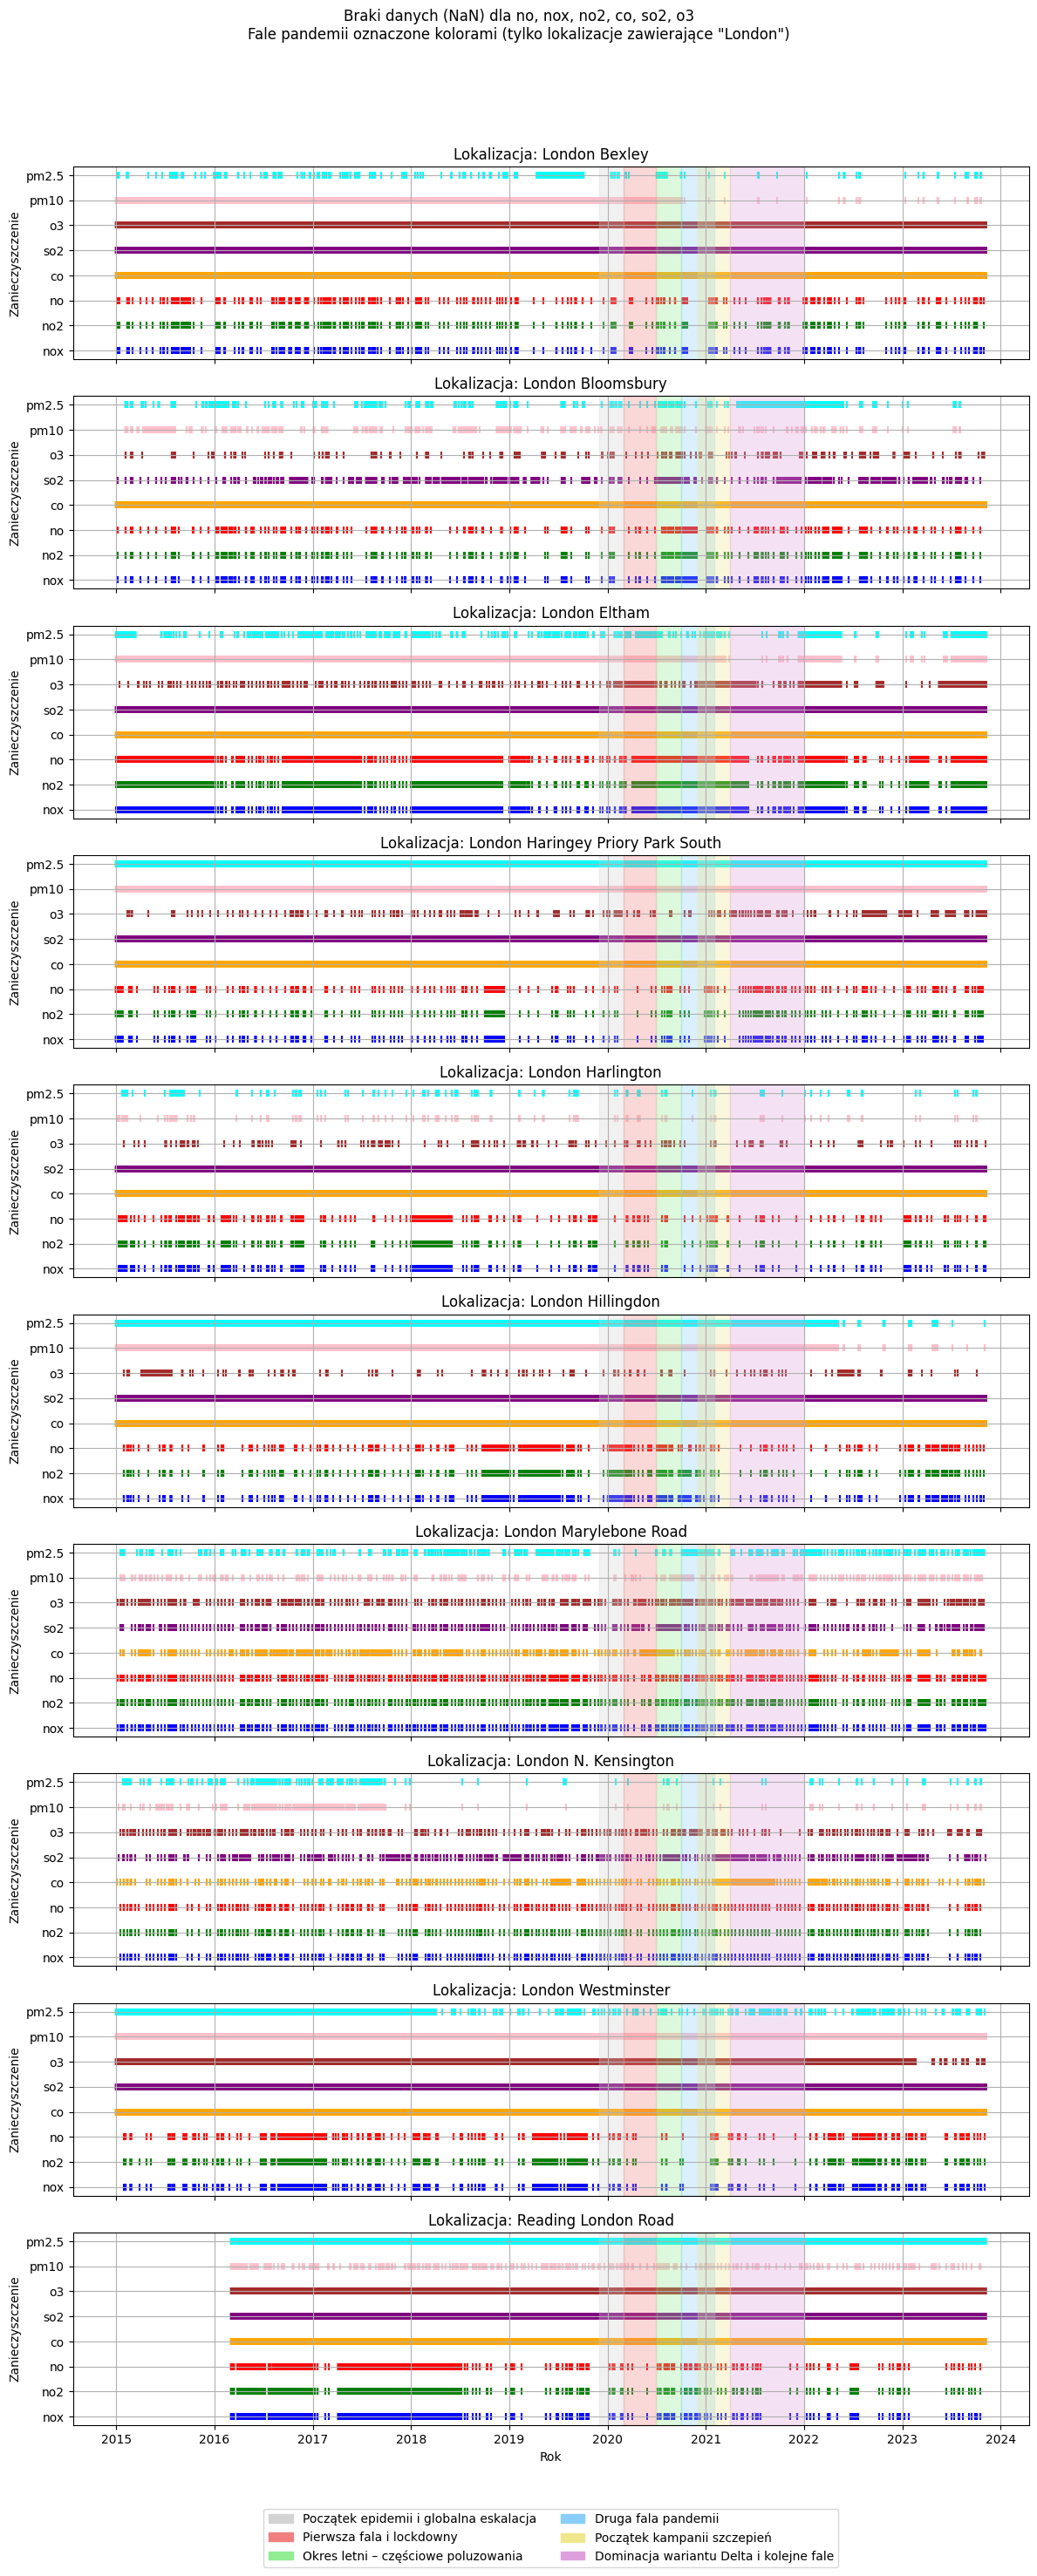

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
# Lista unikalnych lokalizacji z brakami danych
sites = df_air_London['site'].unique()
n = len(sites)

# Fale pandemii jako zakresy dat i kolory
pandemic_phases = [
    ("Początek epidemii i globalna eskalacja", '2019-12-01', '2020-03-01', 'lightgrey'),
    ("Pierwsza fala i lockdowny", '2020-03-01', '2020-06-30', 'lightcoral'),
    ("Okres letni – częściowe poluzowania", '2020-07-01', '2020-09-30', 'lightgreen'),
    ("Druga fala pandemii", '2020-10-01', '2021-01-31', 'lightskyblue'),
    ("Początek kampanii szczepień", '2020-12-01', '2021-03-31', 'khaki'),
    ("Dominacja wariantu Delta i kolejne fale", '2021-04-01', '2021-12-31', 'plum')
]

# Utwórz osobne wykresy dla każdej lokalizacji (bez grupowania po site_type)
fig, axes = plt.subplots(n, 1, figsize=(12, 3 * n), sharex=True)
if n == 1:
    axes = [axes]

for ax, site in zip(axes, sites):
    df_site = df_air_London[df_air_London['site'] == site]
    dates = df_site['date'].astype('datetime64[ns]')
    nox_nan = df_site['nox'].isna()
    no2_nan = df_site['no2'].isna()
    no_nan = df_site['no'].isna()
    co_nan = df_site['co'].isna()
    so2_nan = df_site['so2'].isna()
    o3_nan = df_site['o3'].isna()
    pm10_nan = df_site['pm10'].isna()
    pm25_nan = df_site['pm2.5'].isna()

    ax.scatter(dates[nox_nan], ['nox']*nox_nan.sum(), color='blue', label='nox NaN', marker='|')
    ax.scatter(dates[no2_nan], ['no2']*no2_nan.sum(), color='green', label='no2 NaN', marker='|')
    ax.scatter(dates[no_nan], ['no']*no_nan.sum(), color='red', label='no NaN', marker='|')
    ax.scatter(dates[co_nan], ['co']*co_nan.sum(), color='orange', label='co NaN', marker='|')
    ax.scatter(dates[so2_nan], ['so2']*so2_nan.sum(), color='purple', label='so2 NaN', marker='|')
    ax.scatter(dates[o3_nan], ['o3']*o3_nan.sum(), color='brown', label='o3 NaN', marker='|')
    ax.scatter(dates[pm10_nan], ['pm10']*pm10_nan.sum(), color='pink', label='pm10 NaN', marker='|')
    ax.scatter(dates[pm25_nan], ['pm2.5']*pm25_nan.sum(), color='cyan', label='pm2.5 NaN', marker='|')     

    # Dodanie zakresów pandemicznych jako tła
    for phase, start, end, color in pandemic_phases:
        ax.axvspan(pd.to_datetime(start), pd.to_datetime(end), color=color, alpha=0.3)

    ax.set_ylabel('Zanieczyszczenie')
    ax.set_title(f'Lokalizacja: {site}')
    ax.grid(True)

# Dodanie legendy pandemicznych faz pod wykresami
legend_patches = [mpatches.Patch(color=color, label=phase) for phase, _, _, color in pandemic_phases]
plt.legend(handles=legend_patches, loc='upper center', bbox_to_anchor=(0.5, -0.4), ncol=2)

plt.xlabel('Rok')
plt.suptitle('Braki danych (NaN) dla no, nox, no2, co, so2, o3\nFale pandemii oznaczone kolorami (tylko lokalizacje zawierające "London")')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [8]:
#usuwnie kolumn z ramki danych df_air_London
df_air_London = df_air_London.drop(columns=['latitude', 'longitude', 'co','so2','nv10','nv2.5','v10','v2.5','ws', 'wd','air_temp','nox','code'])
# zapisanie df_air_London do pliku csv
df_air_London.to_csv("Dane/df_air_London.csv", index=False)

In [10]:
df_air_London = pd.read_csv("Dane/df_air_London.csv")
df_air_London

,Unnamed: 0,site,date,no2,no,o3,pm10,pm2.5,site_type
0,5836225,London Bexley,2015-01-01 00:00:00,12.68051,0.69641,NaN,NaN,30.7,Suburban Background
1,5836226,London Bexley,2015-01-01 01:00:00,12.67924,0.65317,NaN,NaN,21.2,Suburban Background
2,5836227,London Bexley,2015-01-01 02:00:00,10.81806,0.45714,NaN,NaN,18.5,Suburban Background
3,5836228,London Bexley,2015-01-01 03:00:00,9.40807,0.29374,NaN,NaN,17.8,Suburban Background
4,5836229,London Bexley,2015-01-01 04:00:00,10.62346,1.43658,NaN,NaN,12.6,Suburban Background
...,...,...,...,...,...,...,...,...,...
765378,8300611,Reading London Road,2023-11-05 19:00:00,13.57875,0.24946,NaN,15.459,NaN,Urban Traffic
765379,8300612,Reading London Road,2023-11-05 20:00:00,10.71000,0.37419,NaN,17.392,NaN,Urban Traffic
765380,8300613,Reading London Road,2023-11-05 21:00:00,10.32750,0.62365,NaN,19.324,NaN,Urban Traffic
765381,8300614,Reading London Road,2023-11-05 22:00:00,8.79750,0.24946,NaN,12.561,NaN,Urban Traffic


In [12]:
#usuwanie niepotrzebnych kolumn z pliku ltla_newCasesBySpecimenDate.csv
# zawężenie danych do tych, które dotyczą Londynu

#ramka danych z ltla_newCasesBySpecimenDate
df_ltla = pd.read_csv("Dane/ltla_newCasesBySpecimenDate.csv")

#usuwanie kolumn z ramki danych df_ltla
#df_ltla = df_ltla.drop(columns=['metric','metric_name'])



#dane dla area_name zawierającej 'London'
df_ltla = df_ltla[df_ltla['area_name'].str.contains("London")]
# wydrukuj liczbę wierszy
df_ltla.count()

# zapisanie df_ltla do pliku csv
df_ltla.to_csv("Dane/ltla_newCasesBySpecimenDate.csv", index=False)

In [31]:
import pandas as pd
import numpy as np

# Wczytanie danych
df_air_London = pd.read_csv("Dane/df_air_London.csv")
df_ltla = pd.read_csv("Dane/ltla_newCasesBySpecimenDate.csv")
# Upewnij się, że 'date' to typ daty
df_air_London['date'] = pd.to_datetime(df_air_London['date'])

# Wybierz interesujące kolumny
cols = ['date','no2', 'o3', 'pm2.5', 'pm10']
df_air_London = df_air_London[cols]

# Interpolacja (dwustronna: forward + backward)
df_air_London.interpolate(method='linear', limit_direction='both', inplace=True)

print(df_air_London.isna().sum())  # Sprawdź, czy są nadal braki



date     0
no2      0
o3       0
pm2.5    0
pm10     0
dtype: int64


## Wyznaczanie wskaźnika AQI
Dla każdego zanieczyszczenia wyliczany jest wskażnik **IAQI**
<br />

$$\ I = \frac {I_{high} - I_{low}}{C_{high} - C_{low}}\left( C - C_{low} \right) + I_{low} $$
<br />
Gdzie: <br />
 I – Air Quality indeks, <br />
 C – Zmierzone stężenie, <br />
 C<sub>low</sub> , C<sub>high</sub> – górna i dolna granica przedziału, w którym mieści się C,<br />
 I<sub>low</sub> , I<sub>high</sub> – wartości indeksu jakości powietrza odpowiadające tym granicom.


In [37]:
# aqi biblioteki i liczenie AQI
# pip install python-aqi

# https://pypi.org/project/python-aqi/ - link do dokumentacji
# https://github.com/hrbonz/python-aqi/tree/master/aqi - github projektu
                  
%pip install python-aqi
import aqi

# utworzenie ramki danych df_air_YK11 z pliku df_air_YK11.csv
#df_air_YK11 = pd.read_csv("C:\GITHUB\SAD-1\Dane/df_air_YK11.csv")

# For each row in df_air_YK11, calculate AQI and add it to a new column
def calc_aqi(row):
    try:
        if pd.notna(row['o3']) and pd.notna(row['no2']) and pd.notna(row['pm2.5']):
            return aqi.to_aqi([(aqi.POLLUTANT_O3_1H, row['o3']), (aqi.POLLUTANT_NO2_1H, row['no2']), (aqi.POLLUTANT_PM25, row['pm2.5'])], algo=aqi.ALGO_EPA)
        else:
            return None
    except Exception:
        return None
df_air_London['AQI'] = df_air_London.apply(calc_aqi, axis=1)

# dane z df_air_London z kolumną AQI nie zawierającą wartości None
#print(df_air_London[df_air_London['AQI'].notna()])

df_air_London.count()
# wyswietlanie wierszy z wyliczonymi AQI
df_air_London[df_air_London['AQI'].notna()] 

Note: you may need to restart the kernel to use updated packages.


,date,no2,o3,pm2.5,pm10,AQI
77646,2015-01-04 06:00:00,60.58896,0.299360,26.800,24.900000,248
77647,2015-01-04 07:00:00,70.76011,0.598710,26.000,26.500000,494
78144,2015-01-25 00:00:00,79.81946,0.598710,20.200,30.400000,494
78501,2015-02-08 21:00:00,96.63528,0.548820,16.100,22.873000,444
78502,2015-02-08 22:00:00,102.71368,0.598710,16.100,22.906000,494
...,...,...,...,...,...,...
620018,2023-10-16 03:00:00,34.23375,0.598710,9.151,11.700000,494
620283,2023-10-27 04:00:00,26.39250,0.598710,6.321,8.700000,494
691563,2023-02-07 04:00:00,54.66699,0.395150,11.000,12.612214,296
691564,2023-02-07 05:00:00,51.38878,0.444545,12.000,12.612253,340


Graficzna prezentacja infoormacji o danych 

Wyznaczanie wyników AQI dla miasta Londym, poprzez wyszukanie maksymalnej wartości wskaźnika dla danego dnia wśród wszystkich stacji.


In [66]:
# ------------------------------------
# Funkcje do przeliczania AQI
# (Uproszczone progi – przykładowe)
# ------------------------------------


def get_aqi_pm25(value):
    if value <= 12: return 50 * value / 12
    elif value <= 35.4: return 50 + (100 - 50) * (value - 12) / (35.4 - 12)
    else: return 100 + (150 - 100) * (value - 35.4) / (55.4 - 35.4)

def get_aqi_pm10(value):
    if value <= 50: return 50 * value / 50
    elif value <= 100: return 50 + (100 - 50) * (value - 50) / (50)
    else: return 100 + (150 - 100) * (value - 100) / (100)

def get_aqi_o3(value):
    if value <= 100: return 50 * value / 100
    elif value <= 180: return 50 + (100 - 50) * (value - 100) / (80)
    else: return 100 + (150 - 100) * (value - 180) / (100)

def get_aqi_no2(value):
    if value <= 100: return 50 * value / 100
    elif value <= 200: return 50 + (100 - 50) * (value - 100) / (100)
    else: return 100 + (150 - 100) * (value - 200) / (100)

# Oblicz AQI dla każdej kolumny no2, o3, pm2.5, pm10 w ramce danych df_air_London
df_air_London = df_air_London.sort_values(by='date')
df = df_air_London.copy()
df['AQI_no2'] = df['no2'].apply(get_aqi_no2)
df['AQI_o3'] = df['o3'].apply(get_aqi_o3)
df['AQI_pm25'] = df['pm2.5'].apply(get_aqi_pm25)
df['AQI_pm10'] = df['pm10'].apply(get_aqi_pm10)


# dodaj kolumne z maksimum z AQI składników 
df['AQI_day'] = df[['AQI_no2', 'AQI_o3', 'AQI_pm25', 'AQI_pm10']].max(axis=1)


# maksymalna wartosć AQI_day z dnia 2015-01-01
print(df[df['date'] == '2015-01-01']['AQI_day'].max())

# 148.250000
# Możesz teraz pogrupować po dniu (jeśli dane są godzinowe)

# grupowanie danych po dacie w ramce df_daily
df_daily = df.groupby(df['date'].dt.date).aggregate({
    'AQI_day': 'max',
    'AQI_no2': 'max',
    'AQI_o3': 'max',
    'AQI_pm10': 'max',
    'AQI_pm25': 'max'
}).reset_index()

# df_air_london order by date

#df
df_daily = df_daily.sort_values(by='date')

df_daily



115.5


,date,AQI_day,AQI_no2,AQI_o3,AQI_pm10,AQI_pm25
0,2015-01-01,148.250000,42.700625,32.879160,65.400000,148.250000
1,2015-01-02,84.064103,62.620990,37.693785,46.800000,84.064103
2,2015-01-03,81.837607,51.820385,33.852060,30.600000,81.837607
3,2015-01-04,98.677350,59.069955,16.763428,45.600000,98.677350
4,2015-01-05,85.470085,74.519605,27.615500,43.500000,85.470085
...,...,...,...,...,...,...
3227,2023-11-02,104.000000,37.867500,39.914000,29.873277,104.000000
3228,2023-11-03,67.062972,45.517500,34.840840,29.879889,67.062972
3229,2023-11-04,99.145299,31.959695,35.822815,60.871000,99.145299
3230,2023-11-05,84.188034,31.651875,29.619880,32.851000,84.188034


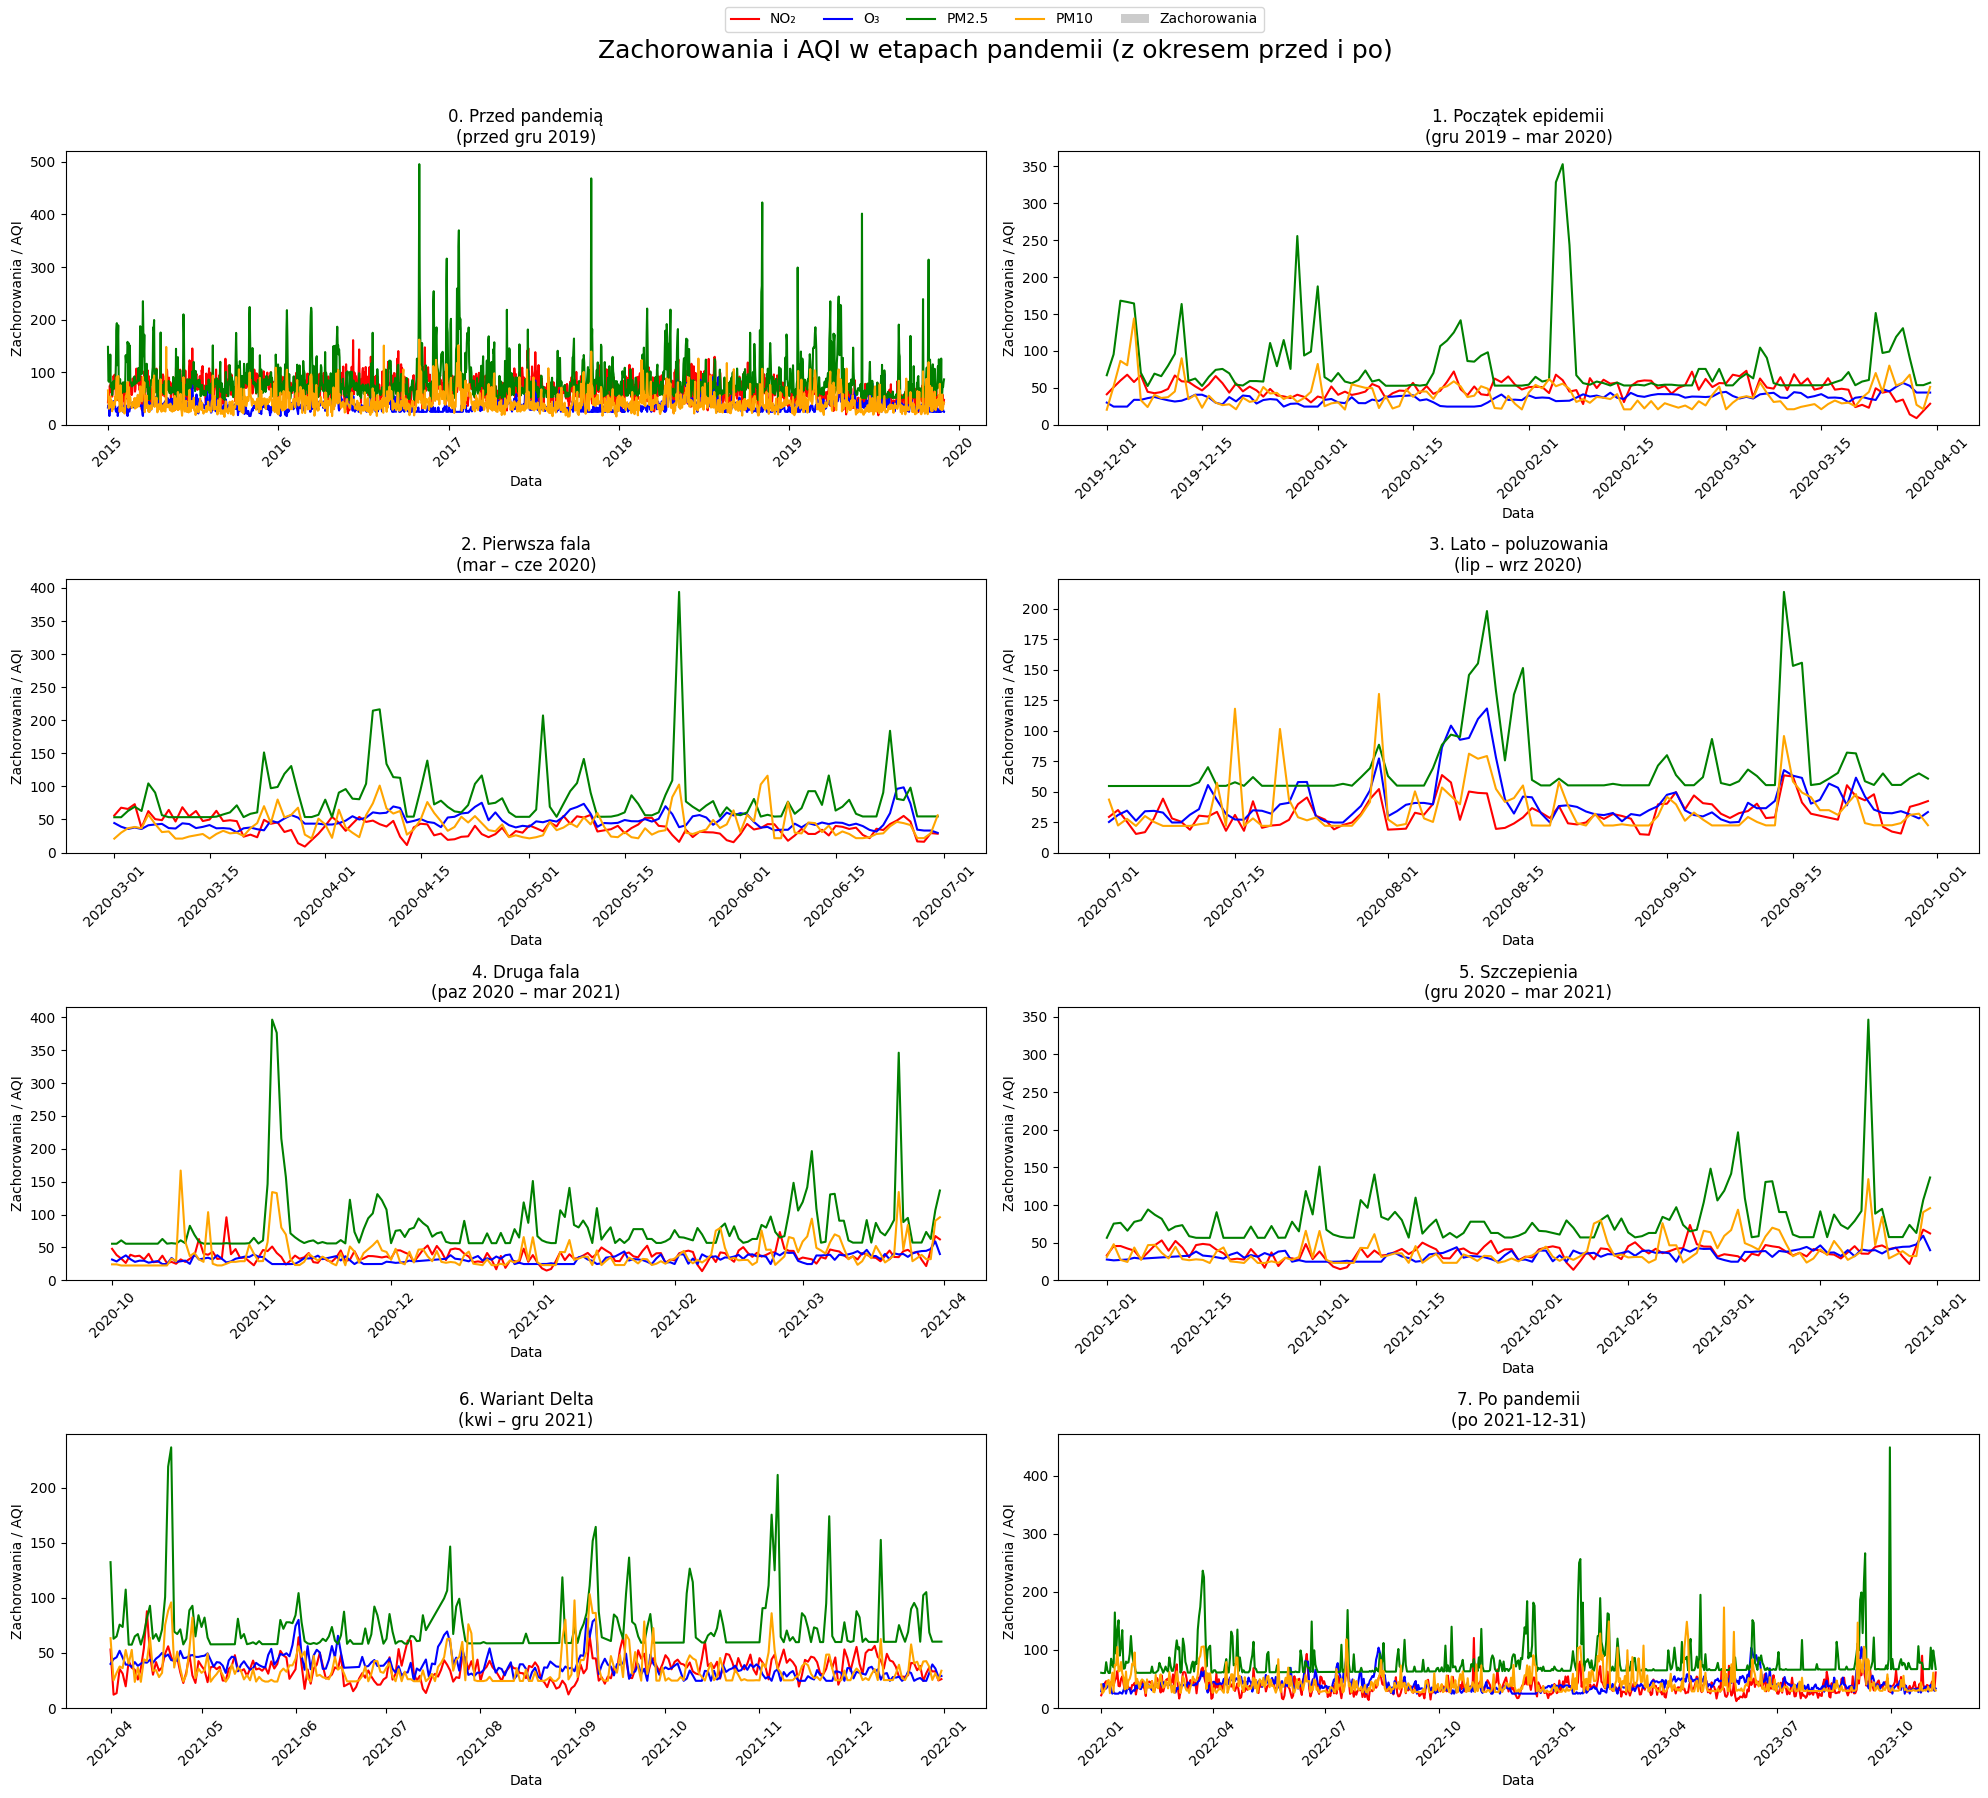

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Zakładamy, że df_merged został już utworzony (połączony po kolumnie 'date')
# Lewostronne łączenie – zachowujemy wszystkie daty z df_daily
df_merged = pd.merge(df_daily, df_ltla[['date', 'value']], on='date', how='left')

# Brakujące zachorowania (value) traktujemy jako 0
df_merged['value'] = df_merged['value'].fillna(0)
# Konwersja kolumny 'date' na typ datetime
df_merged['date'] = pd.to_datetime(df_merged['date'])
# Definicja etapów jako zakresy dat
etapy = {
    "0. Przed pandemią\n(przed gru 2019)": (None, '2019-11-30'),
    "1. Początek epidemii\n(gru 2019 – mar 2020)": ('2019-12-01', '2020-03-31'),
    "2. Pierwsza fala\n(mar – cze 2020)": ('2020-03-01', '2020-06-30'),
    "3. Lato – poluzowania\n(lip – wrz 2020)": ('2020-07-01', '2020-09-30'),
    "4. Druga fala\n(paz 2020 – mar 2021)": ('2020-10-01', '2021-03-31'),
    "5. Szczepienia\n(gru 2020 – mar 2021)": ('2020-12-01', '2021-03-31'),
    "6. Wariant Delta\n(kwi – gru 2021)": ('2021-04-01', '2021-12-31'),
    "7. Po pandemii\n(po 2021-12-31)": ('2022-01-01', None)
}

# Rozmiar całej siatki wykresów (2 kolumny, 4 wiersze = 8 wykresów)
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 18))
axs = axs.flatten()

# Tworzenie wykresu dla każdego etapu
for i, (tytul, (start, end)) in enumerate(etapy.items()):
    if start and end:
        mask = (df_merged['date'] >= start) & (df_merged['date'] <= end)
    elif start and end is None:
        mask = df_merged['date'] >= start
    elif end and start is None:
        mask = df_merged['date'] <= end
    else:
        continue
    df_etap = df_merged.loc[mask]

    ax = axs[i]

    # Słupki: zachorowania
    ax.bar(df_etap['date'], df_etap['value'], width=2, alpha=0.4, label='Zachorowania', color='gray')

    # Linie: AQI
    ax.plot(df_etap['date'], df_etap['AQI_no2'], label='NO₂', color='red')
    ax.plot(df_etap['date'], df_etap['AQI_o3'], label='O₃', color='blue')
    ax.plot(df_etap['date'], df_etap['AQI_pm25'], label='PM2.5', color='green')
    ax.plot(df_etap['date'], df_etap['AQI_pm10'], label='PM10', color='orange')

    ax.set_title(tytul)
    ax.set_xlabel("Data")
    ax.set_ylabel("Zachorowania / AQI")
    ax.tick_params(axis='x', rotation=45)

# Wspólna legenda
handles, labels = axs[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=5)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("Zachorowania i AQI w etapach pandemii (z okresem przed i po)", fontsize=18)
plt.show()